# 다항 회귀
## 다항 회귀란
2차, 3차 방정식과 같은 다항식으로 회귀식이 표현되는 것
ScikitLearn 에서는 PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
print("feature:", X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("poly feature", poly_ftr)

feature: [[0 1]
 [2 3]]
poly feature [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)
print(y)

[  5 125]


In [4]:
from sklearn.linear_model import LinearRegression

# polynomial
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("feature: \n", poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial coef:", np.round(model.coef_, 2))
print("Polynomial Regression Shape:", model.coef_.shape)

feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial coef: [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial Regression Shape: (10,)


더 명료하게 코드를 작성하는 방법

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

model = Pipeline([("poly", PolynomialFeatures(degree=3)),
                  ("linear", LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print("Polynomial Regression Coef:", np.round(model.named_steps["linear"].coef_, 2))

Polynomial Regression Coef: [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 과소적합과 과(대)적합

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

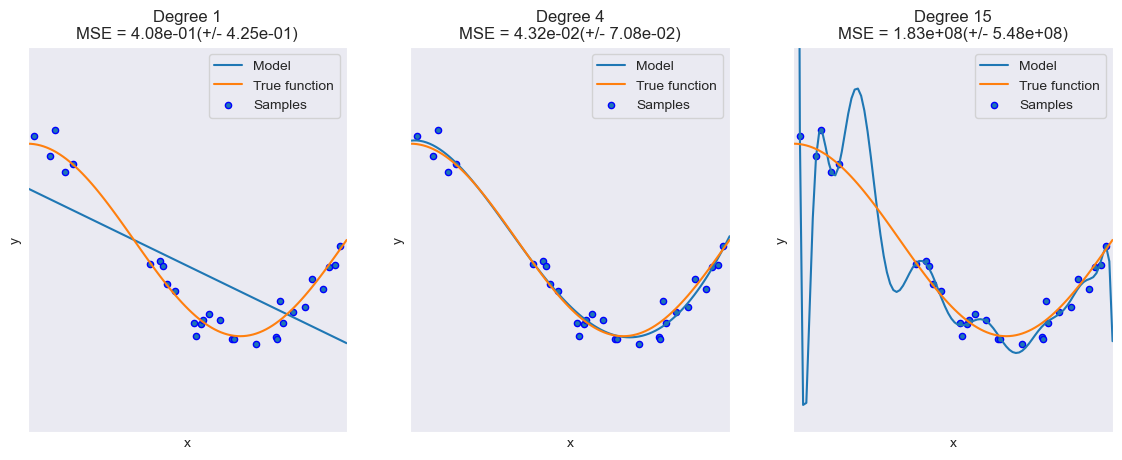

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# returns cosine converted value of X
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X: sampling data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y: cosine converted value + small noise
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.figure(figsize=(14, 5))

degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # change to Polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using Cross Validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

이상적인 예측은 Degree2, Degree1 은 사실상 단순 직선 선형 회귀이고, Degree 15는 지나친 데이터 과적합으로 오히려 MSE가 지나치게 높아진 결과를 보여줌.

## 편향-분산 트레이드오프 (Bias-Variance Trade off)

Degree 1 처럼 단순화된 모델은 편향성을 가졌다고 표현
Degree 15 처럼 지나치게 높은 변동성을 가진 모델은 고분산성을 가졌다고 표현

일반적으로 편향과 분산은 trade-off의 성격을 지님 -> 적정한 지점을 찾는 것이 매우 중요